<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/XR/Lab4_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. Characteristic X-Ray radiation from metals

Igor Gitelman, 2024, v0.1.1 (UNDER CONSTRUCTION)

In [1]:
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
import pandas as pd # handling data structures (loaded from files)
from scipy.signal import find_peaks as find_peaks # Find peaks inside a signal based on peak properties.
from scipy.stats import linregress as linregress #Calculate a linear least-squares regression for two sets of measurements.
from scipy.optimize import curve_fit # Use non-linear least squares to fit a function, f, to data.
import scipy.constants as const # Physical and mathematical constants and units.
from scipy.integrate import cumulative_trapezoid # Cumulatively integrate y(x) using the composite trapezoidal rule.

Defining python function for smooth the data <b>y</b> over numbers of points <b>box_pts</b>, for later use.

In [2]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts #running average
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

<h2>Calibration of the energy detector </h2>

This is the typical procedure you can use. You measure a spectrum and save it to a file, like “Mes1.txt”.
Then you can use a code similar to the one below to import and smooth the data, and to plot it.

In [3]:
# place path to your data here
# when using Anaconda UPLOAD files to your localhost
URL = 'https://raw.githubusercontent.com/tphlabs/data/main/Lab4_Xray/2024.10.30/Mo_calibration.txt'

Mes1 = pd.read_csv(URL,sep='\t',header=1) # read the data.
Counts = np.array(Mes1['Impulses/#']) # Impulses
Counts_smoothed=smooth(Counts, 10) # smooth the data over 10 channels
Channels = np.array(Mes1['Channel/#']) # Channel

Find the line's energy, using for example from scipy.signal module, the function find_peaks.

In [17]:
peaks, _ = find_peaks(Counts_smoothed, height=100, prominence=40)

you need to understand the properties of this function, later you will use these properties to analyze another spectrum.

As previously we plot the figure

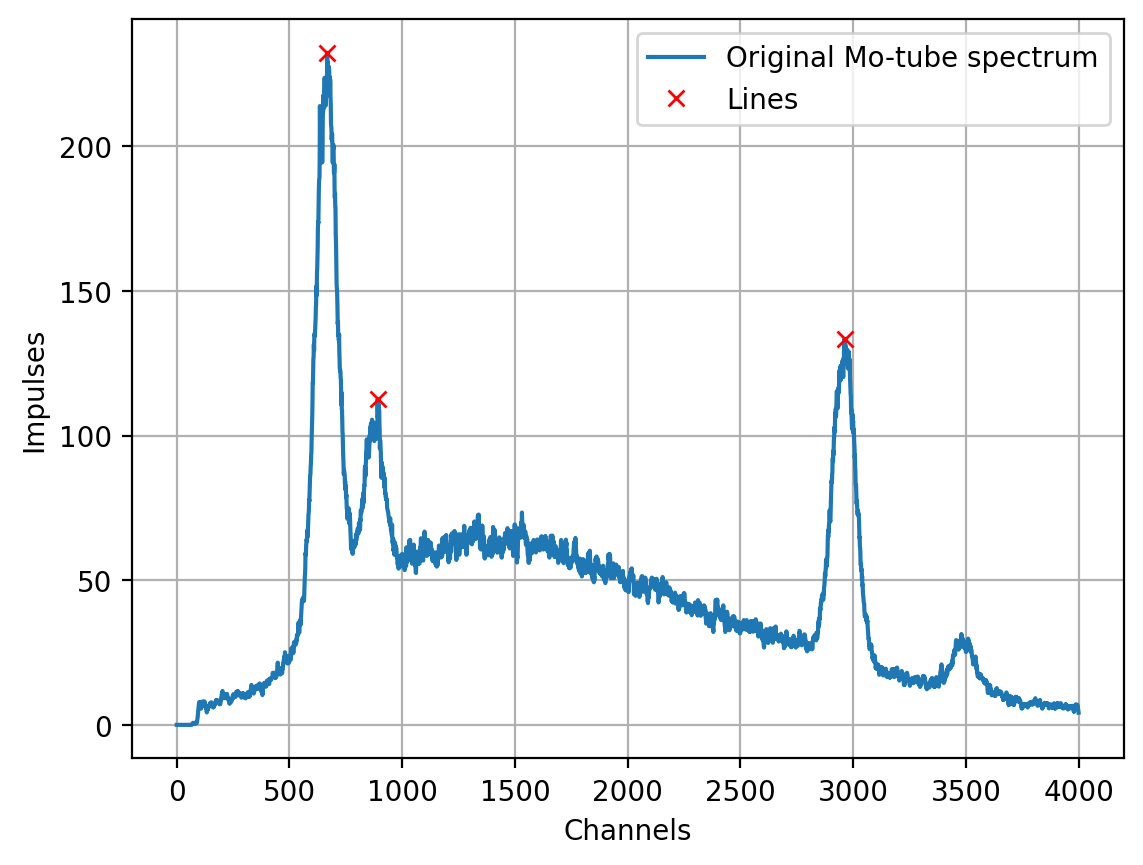

In [5]:
plt.figure(dpi=200) # Define new figure, and set "Dots per Inch" or "dpi"
plt.plot(Channels ,Counts_smoothed, label='Original Mo-tube spectrum') # plot the line and save the appropriate label.
plt.plot(Channels[peaks] ,Counts_smoothed[peaks],"x",color='red',
label='Lines') #plot the peaks
plt.ylabel('Impulses') #Y axis label
plt.xlabel('Channels') #X axis label
plt.grid() #put grid, optional
plt.legend() # put the legends

Now we  can take the line profiles and fit it with curve_fit function from scipy.optimize module to Gaussian fanction with hight.
$$
f(x)=H+A\cdot \exp{\left(\frac{(x-x_0)^2}{2σ^2}\right)}
$$

In [18]:
peaks

array([ 667,  891, 2962])

Now you need to calibrate the energy detector, this mean find the function Chenels(energy). According to the maker of this detector this function is linear
$$
C(E)=a\cdot E + b
$$
as you can see in the manual -> Energy Detector Calibration ->  fourth point.

You do this with the following materials 22 Ti, 23 V, 26 Fe, 28 Ni, 29 Cu, 30 Zn, 42 Mo, 82 Pb and probably others, the lines can be taken from a file on the Moodle site "X-ray Emission Lines".

So, you know from the characteristic emission the energy of the line and from the measured spectrum the channels this energy corresponds.

In [19]:
# 42 Mo 17,479.34 17,374.3 19,608.3
Mo=[17479.34, 17374.3, 19608.3] # eV Now you can use this for inserting to the line energy list.
Ka = (Mo[0] + Mo[1])/2
Kb = Mo[2]
Energy = [Ka, Kb]
Channel = peaks[0:2]
Channel, Energy, peaks

(array([667, 891]), [17426.82, 19608.3], array([ 667,  891, 2962]))

now find the linear regresion and plot it.

R-squared: 1.000000


LinregressResult(slope=9.738749999999998, intercept=10931.07375, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

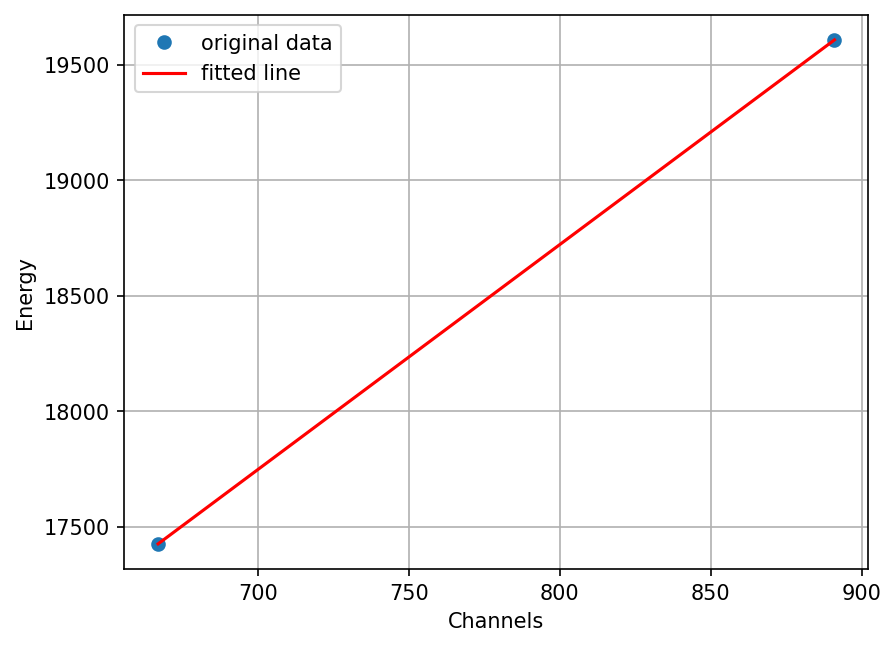

In [22]:
res = linregress(Channel, Energy)
print(f"R-squared: {res.rvalue**2:.6f}")

plt.figure(dpi=150) # Define new figure, and set "Dots per Inch" or "dpi"
plt.plot(Channel, Energy, 'o', label='original data') # plot the line and save the appropriate label.
plt.plot(Channel, res.intercept + res.slope*Channel, 'r', label='fitted line') # plot the fited line and save the appropriate label.
plt.ylabel('Energy') # Y axis label
plt.xlabel('Channels') # X axis label
plt.grid() # put grid, optional
plt.legend() # put the legends
res

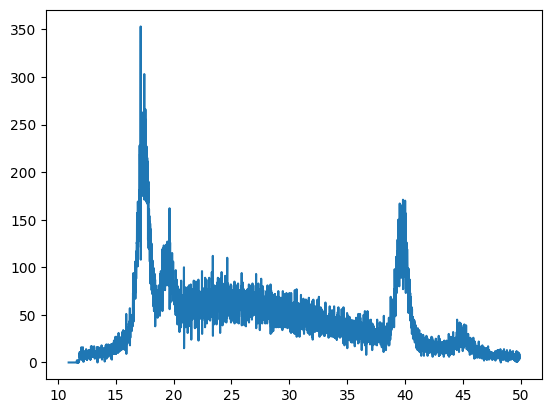

In [25]:
spectrum_energy = res.intercept + res.slope*Channels
plt.plot(spectrum_energy/1e3, Counts)

## Analyze alloys and crystals